In [547]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [548]:
#for google colab

#from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)
#import os
#os.chdir('/content/gdrive/My Drive')

In [549]:
df = pd.read_csv('Datechange_HPIbench.csv')

In [550]:
df=df[['area', 'benchmark_price','property_type', 'Date']]
df['property_type'].unique()

array(['Residential - All Types', 'Detached', 'Townhouse', 'Apartment'],
      dtype=object)

In [551]:
df_Apt=df[(df['area']=='vancouver_east')&(df['property_type']=='Townhouse')]
df_Apt['Date']=pd.to_datetime(df_Apt['Date'], format='%Y-%m')

In [552]:
df_Apt.columns

Index(['area', 'benchmark_price', 'property_type', 'Date'], dtype='object')

In [553]:
df_date_index=df_Apt

In [554]:
#df_Apt['month'] = df_Apt['Date'].dt.month
#df_Apt['year'] = df_Apt['Date'].dt.year
#df_date_index=df_Apt.set_index('Date')

In [555]:
del(df_date_index['area'])
del(df_date_index['property_type'])

In [556]:
#df_date_index = pd.get_dummies(df_date_index, columns = ['month'] , prefix = ['month'])
df_date_index 


,benchmark_price,Date
2,363500,2006-01-01
6,368900,2006-02-01
10,374700,2006-03-01
14,381700,2006-04-01
18,389000,2006-05-01
22,396700,2006-06-01
26,401200,2006-07-01
30,405800,2006-08-01
34,410400,2006-09-01
38,411900,2006-10-01


In [557]:
#dick fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(benchmark_price, window = 12, cutoff = 0.01):
    rolmean = benchmark_price.rolling(window).mean()
    rolstd = benchmark_price.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(benchmark_price, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    X = benchmark_price.values
    result = adfuller(X)
    print('Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


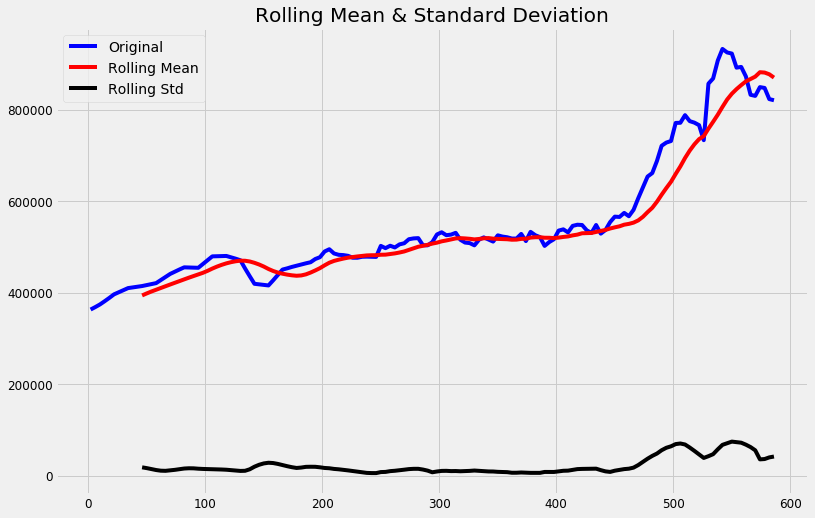

Statistic: -1.549727
p-value: 0.508784
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


In [558]:
#check stationary properties of the dataset, large p values. 
#statistics larger than critical values cant reject null hypothesis

test_stationarity(df_date_index['benchmark_price'])



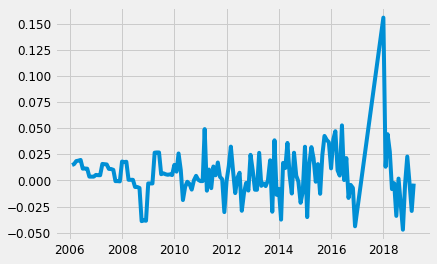

In [559]:
diff=df_date_index.set_index('Date')
#shifting for seasonality
df_date_index= np.log(diff)
datasetLogDiffShifting = df_date_index - df_date_index.shift()
datasetLogDiffShifting.dropna(inplace=True)
plt.plot(datasetLogDiffShifting)


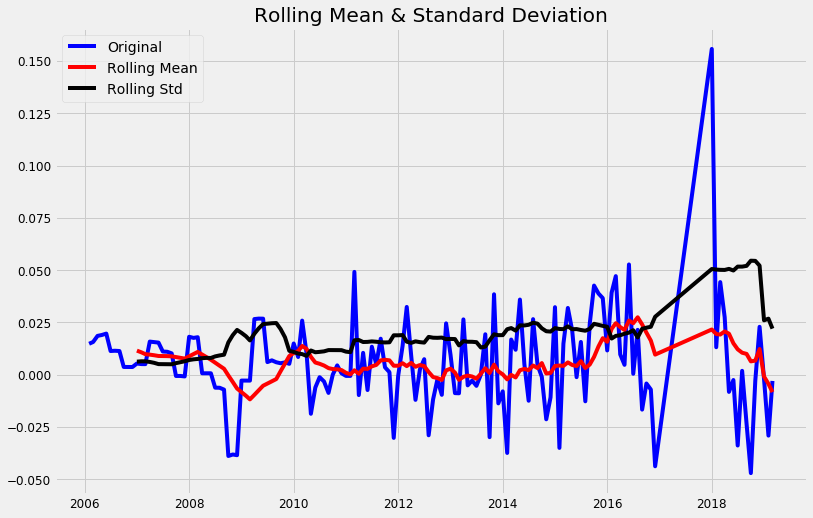

Statistic: -6.697542
p-value: 0.000000
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [561]:
#dicky fuller test for the shifted series
test_stationarity(datasetLogDiffShifting['benchmark_price'])

In [564]:
datasetLogDiffShifting

,benchmark_price
Date,
2006-02-01,0.014746
2006-03-01,0.015600
2006-04-01,0.018509
2006-05-01,0.018944
2006-06-01,0.019601
2006-07-01,0.011280
2006-08-01,0.011400
2006-09-01,0.011272
2006-10-01,0.003648


Plotting ARIMA model


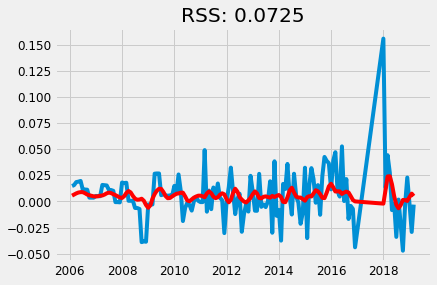

In [565]:
# AR+I+MA = ARIMA model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
model = ARIMA(df_date_index , order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['benchmark_price'])**2))
print('Plotting ARIMA model')

In [572]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2006-02-01    0.005534
2006-03-01    0.006541
2006-04-01    0.007708
2006-05-01    0.008534
2006-06-01    0.008912
dtype: float64


In [573]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [575]:
predictions_ARIMA_log = pd.Series(df_date_index['benchmark_price'].iloc[0], index=df_date_index.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2006-01-01    12.803535
2006-02-01    12.809069
2006-03-01    12.815610
2006-04-01    12.823317
2006-05-01    12.831851
dtype: float64

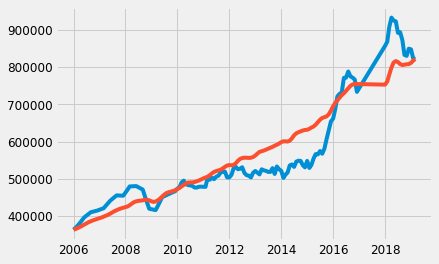

In [577]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(diff)
plt.plot(predictions_ARIMA)

In [596]:
future_value=results_ARIMA.forecast(steps=10)


In [ ]:
#testing for model sarimax

In [566]:
#parameterrs set
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameters combination...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal[2]))

Parameters combination...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [582]:
#select with the lowest AIC value, grid search for parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(diff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4284.412955181067
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3856.687726239563
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3392.366326813718
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3084.477442552092
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3357.46488313394
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3335.2648803195616
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3088.683464743871
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3067.18469987803
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4152.589902542782
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3788.155550431976
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3283.5166287775955
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2983.506722048753
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3832.992838813232
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3778.2029605223697
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3031.1003745764647
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2984.4092937709747
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3218.938198342961
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2966.8109900952004
ARIMA(

In [583]:
#fit the model
mod = sm.tsa.statespace.SARIMAX(diff,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8262      0.222      3.719      0.000       0.391       1.262
ma.L1         -0.6536      0.279     -2.347      0.019      -1.199      -0.108
ar.S.L12      -0.7371      0.187     -3.948      0.000      -1.103      -0.371
ma.S.L12      -0.1260      0.115     -1.098      0.272      -0.351       0.099
sigma2      5.148e+08    1.2e-09   4.29e+17      0.000    5.15e+08    5.15e+08


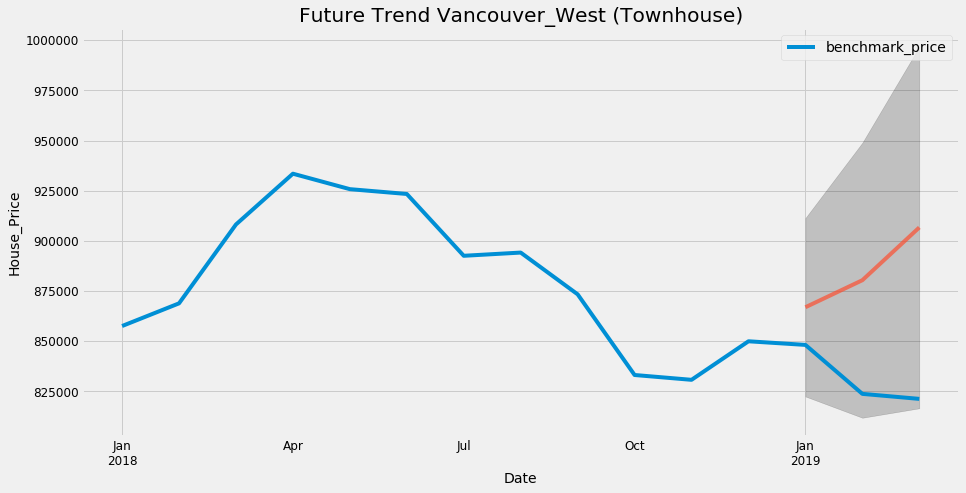

In [584]:
#pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
#check result, more testing needed for better accuracy
pred =results.get_prediction(start = diff.index.get_loc(pd.to_datetime("2019-01-01")),dynamic=True)

pred_ci = pred.conf_int()
ax = diff['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('House_Price')
plt.title('Future Trend Vancouver_West (Townhouse)')
plt.show()

In [585]:
y_forecasted = pred.predicted_mean
y_truth = diff['2019-01-01':]
mse = ((y_forecasted[0] - y_truth['benchmark_price']) ** 2).mean()

In [586]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 37866.43


In [587]:
#forecast for next 10 months
pred_uc = results.get_forecast(steps=10)

In [588]:

pred_ci = pred_uc.conf_int()


In [589]:
forecast=pred_uc

In [590]:
pred_uc.predicted_mean

147    817044.736946
148    807722.865932
149    827162.734056
150    815616.907045
151    821035.043832
152    804001.829320
153    793691.495389
154    787508.864318
155    764270.643738
156    855616.950188
dtype: float64